In [ ]:
pip install tensorflow opencv-python

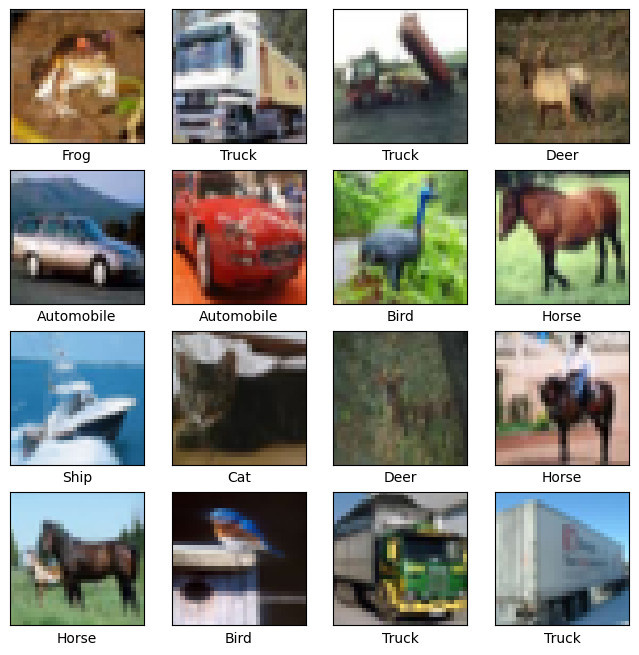

In [28]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

# UWAGA: poniższa linijka pobierze dane CIFAR10 - pobieranie może trwać długo, nawet 40 minut!
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()

# Normalizacja danych - obrazy ze skali RGB 0-255 do 0.0-1.0
training_images, testing_images = training_images / 255, testing_images / 255

# Nazwy kolejnych klas w bazie Cifar10
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

fig, axes = plt.subplots(4, 4, figsize=(8, 8))
# Wyświetlenie obrazów jako wykresu
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])

plt.show()

In [22]:
# ograniczenie zbioru danych do uczenia - dla oszczędności czasu uczenia (całość: 50k+10k)
training_images = training_images[:10000]
training_labels = training_labels[:10000]
testing_images = testing_images[:2000]
testing_labels = testing_labels[:2000]

In [23]:
# Tworzenie modelu SSN do uczenia - UWAGA: przy dużych liczbach może zająć dużo czasu!
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

Epoch 1/10
313/313 [==============================] - 5s 13ms/step - loss: 1.9275 - accuracy: 0.2800 - val_loss: 1.6522 - val_accuracy: 0.3990
Epoch 2/10
313/313 [==============================] - 4s 12ms/step - loss: 1.5540 - accuracy: 0.4323 - val_loss: 1.4848 - val_accuracy: 0.4665
Epoch 3/10
313/313 [==============================] - 4s 13ms/step - loss: 1.3920 - accuracy: 0.4931 - val_loss: 1.5377 - val_accuracy: 0.4740
Epoch 4/10
313/313 [==============================] - 4s 12ms/step - loss: 1.2896 - accuracy: 0.5373 - val_loss: 1.3272 - val_accuracy: 0.5210
Epoch 5/10
313/313 [==============================] - 4s 12ms/step - loss: 1.2028 - accuracy: 0.5702 - val_loss: 1.3626 - val_accuracy: 0.5255
Epoch 6/10
313/313 [==============================] - 4s 12ms/step - loss: 1.1212 - accuracy: 0.6000 - val_loss: 1.2605 - val_accuracy: 0.5475
Epoch 7/10
313/313 [==============================] - 4s 13ms/step - loss: 1.0445 - accuracy: 0.6285 - val_loss: 1.2304 - val_accuracy: 0.5730

In [24]:
# Walidacja modelu

loss, accuracy = model.evaluate(testing_images, testing_labels)
print("Loss: " + str(loss))
print("Accuracy: " + str(accuracy))

63/63 [==============================] - 0s 5ms/step - loss: 1.2000 - accuracy: 0.5835
Loss: 1.1999742984771729
Accuracy: 0.5835000276565552


In [26]:
# OPERACJE OPCJONALNE
# Zapisanie modelu (żeby go nie uczyć za każdym razem)
model.save("image_classifier.model")

# Odtworzenie modelu
model = models.load_model("image_classifier.model")

INFO:tensorflow:Assets written to: image_classifier.model\assets


INFO:tensorflow:Assets written to: image_classifier.model\assets


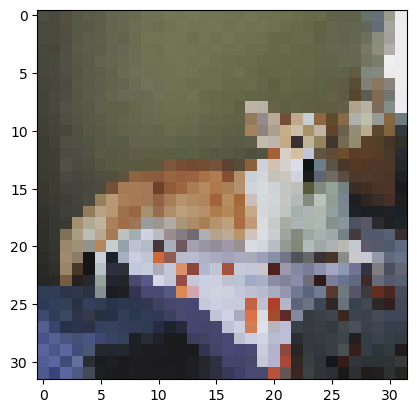

1/1 [==============================] - 0s 28ms/step
This image is: Bird


In [42]:
# Otworzenie dowolnego obrazka, na którym użyjemy modelu
img = cv.imread('corgi.jpg')

# Przejście z modelu BGR (domyślny w OpenCV) do RGB
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Zmiana rozmiaru obrazka, żeby był zgodny z danymi CIFAR-10
img = cv.resize(img, (32, 32)) 

# Wyświetlenie obrazka
plt.imshow(img)
plt.show()

# Predykcja - próba klasyfikacji obrazu przy wykorzystaniu modelu
prediction = model.predict(np.array([img]) / 255)

index = np.argmax(prediction)
print("This image is: " + class_names[index])